# RMC for exp
We solve 
$$y'=y$$
$y(0) =1$ with RMC.


In [2]:
from random import random
from math import sqrt
#estimator for exp(x) without control variate
def yr(start,eps):
    return 1 + start* yr(random()*start,eps) if start>eps else 1

#estimator for exp(x) with control variate 1 + x 
def yrs(start,eps):
    if start<eps:
        return 1+start + start**2/2
    else:
        s = random()*start
        return 1+ start + start**2/2 + start*(yrs(s,eps)-1-s)

#estimator for exp(x) with control variate 1 +x+x**2/2 
def yrr(start,eps):
    if start<eps:
        return 1+start + start**2/2 + start**3/6
    else:
        s = random()*start
        return 1+ start + start**2/2 + start**3/6+ start*(yrs(s,eps)-1-s-s**2/2)

def f(fun,start,eps=0.01,nsim=1000):
    res = 0
    for _ in range(nsim):
        res +=fun(start,eps)/nsim
    return res


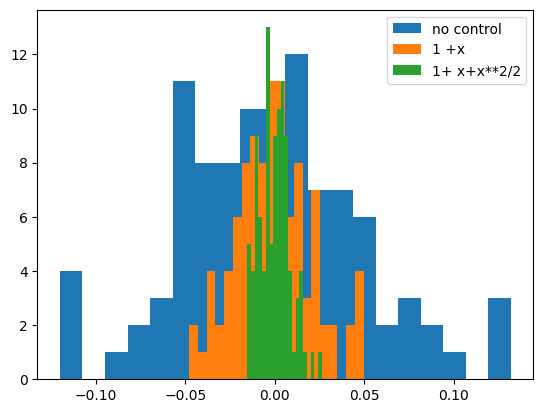

In [3]:
from math import exp
import matplotlib.pyplot as plt
tmp1=[]
for _ in range(100):
    tmp1.append(f(yr,1, 0.0001,100)-exp(1))

tmp2=[]
for _ in range(100):
    tmp2.append(f(yrs,1, 0.0001,100)-exp(1))

tmp3=[]
for _ in range(100):
    tmp3.append(f(yrr,1, 0.0001,100)-exp(1))

plt.hist(tmp1, bins = 20, label= "no control")
plt.hist(tmp2, bins = 20, label= "1 +x")
plt.hist(tmp3, bins = 20, label= "1+ x+x**2/2")
plt.legend()
plt.show()
    

Same problem but
$$y' = ty$$
with $y(0)=1$

In [4]:
def test(start,eps,memo):
    if start<eps :
        res = 1
    else:
        s = random()*start
        y, m = test(s,eps,memo) 
        memo +=m
        res = 1 + start*s* y
    memo += [(start,res)] 
    return res, memo

    

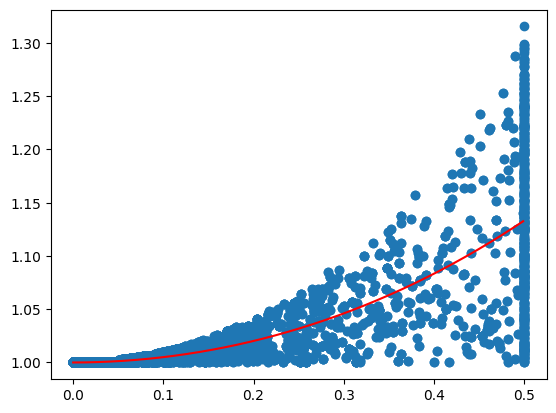

-0.00034188186973226715


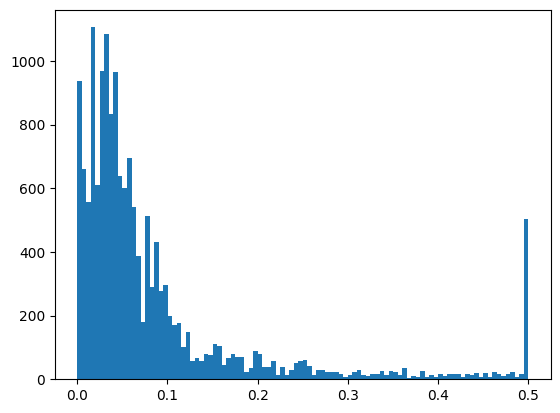

In [5]:
m = []
res = 0
for _ in range(500):
    memo = []
    r ,_  =test(0.5,0.05,memo)
    res +=r/500
    m +=memo

x,y = zip(*m)
xx = [n/1000 for n in range(0,500)]
yy = [exp(xi**2/2) for xi in xx]
plt.plot(xx,yy,color ="red")
plt.scatter(x,y)
plt.show()

print((res-exp(0.5**2/2))/exp(0.5**2/2))
plt.hist(x,bins = 100)
plt.show()

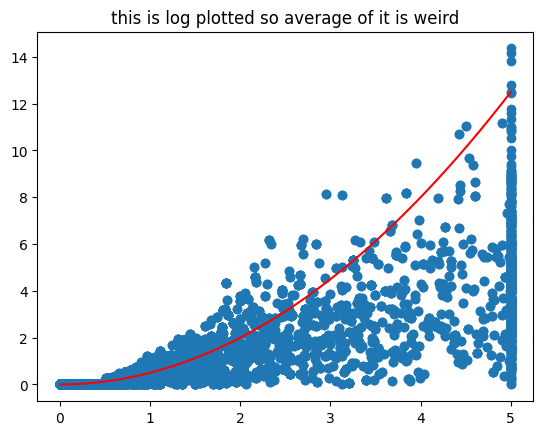

-0.954786904017132


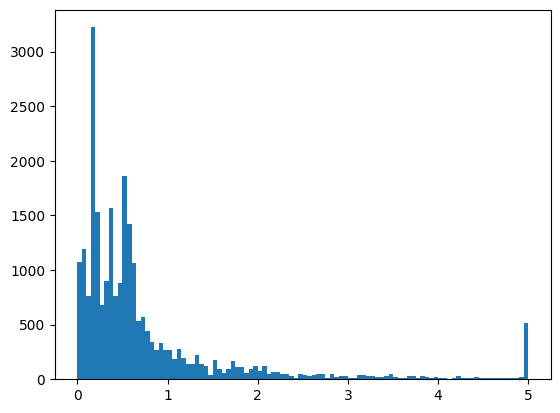

In [6]:
from math import log
m = []
res = 0
for _ in range(500):
    memo = []
    r ,_  =test(5,0.5,memo)
    res +=r/500
    m +=memo

x,y = zip(*m)
xx = [n/1000 for n in range(0,5000)]
yy = [xi**2/2 for xi in xx]
plt.plot(xx,yy,color ="red")
plt.scatter(x,[log(yi) for yi in y])
plt.title("this is log plotted so average of it is weird")
plt.show()

print((res-exp(5**2/2))/exp(5**2/2))
plt.hist(x,bins = 100)
plt.show()

Now add killing for $y'=y$

In [7]:
def test_kill(start,memo):
    p_of_kill = 1-start
    if random()<p_of_kill:
        res = 1
    else:
        y, m = test_kill(random()*start,memo) 
        memo +=m
        res = 1 + start* y/(1-p_of_kill)
    memo += [(start,res)] 
    return res, memo

    

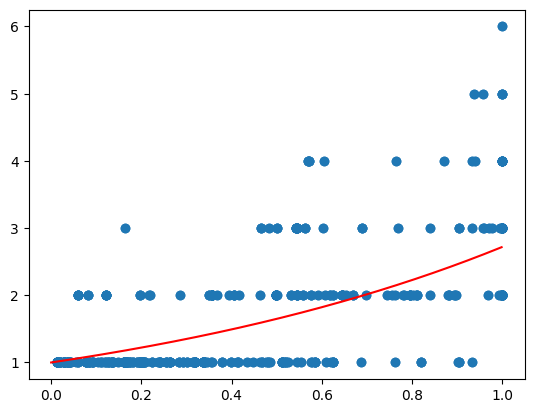

0.011668463221466112


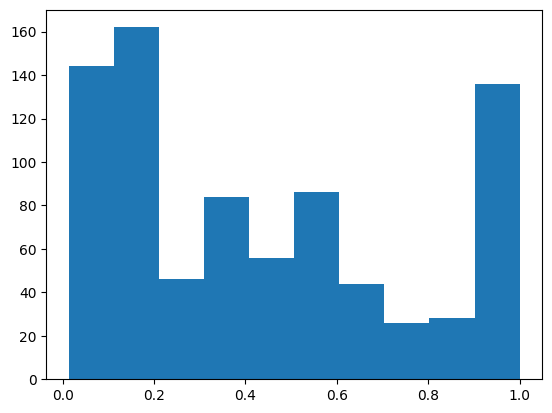

In [19]:
m = []
res=0
for _ in range(100):
    memo = []
    a,_ =test_kill(1,memo)
    res += a/100
    m +=memo

x,y = zip(*m)
xx = [n/1000 for n in range(0,1000)]
yy = [exp(xi) for xi in xx]
plt.plot(xx,yy,color ="red")
plt.scatter(x,y)
plt.show()
print((res-exp(1))/exp(1))
plt.hist(x,bins = 10)
plt.show()

Lets do a test on following problem
$$y'= \frac{y}{1+s}$$

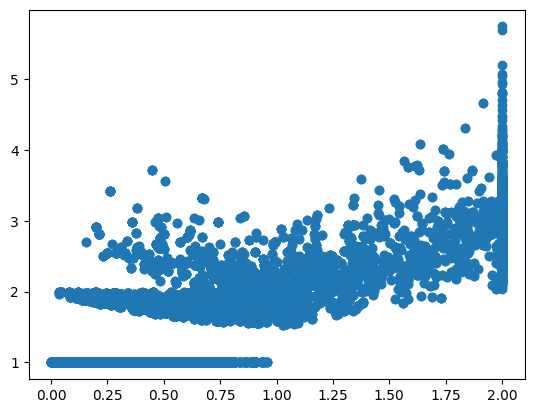

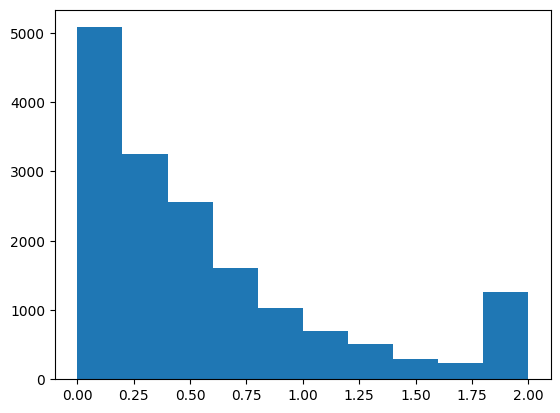

In [9]:
def test_kill2(start,memo):
    p_of_kill = (1-start) if start<1 else 0
    if random()<p_of_kill:
        res = 1
    else:
        s = random()*start
        y, m = test_kill2(s,memo) 
        memo +=m
        res = 1 + start* y/((1-p_of_kill)*(1+s))
    memo += [(start,res)] 
    return res, memo


m = []
endy = []
res=0
for _ in range(1000):
    memo = []
    a, _ = test_kill2(2,memo)
    endy.append(a) 
    m +=memo

x,y = zip(*m)
plt.scatter(x,y)
plt.show()
plt.hist(x,bins = 10)
plt.show()

It look like there is a linear trend in the data lets transform it
$$y = tu$$

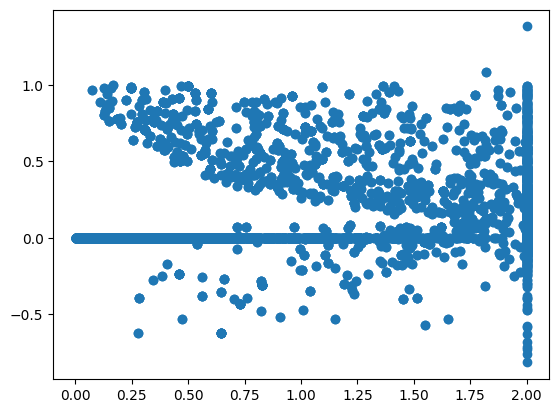

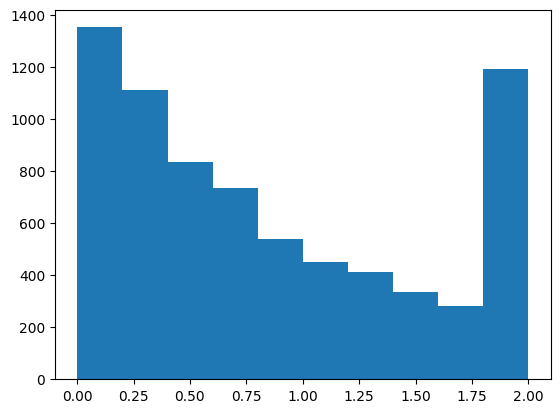

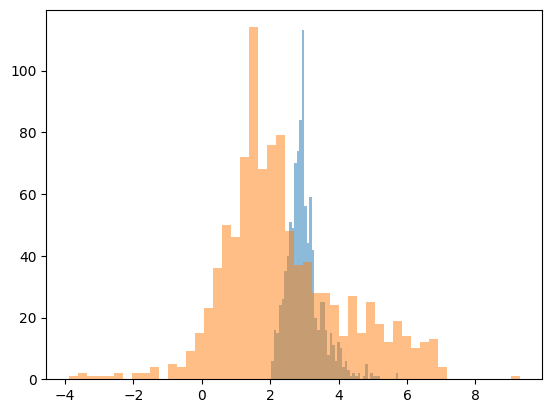

In [12]:
def test_kill2t(start,memo):
    p_of_kill = 1-start/2 if start<2 else 0
    if random()<p_of_kill:
        res = 0
    else:
        s = random()*start
        y, m = test_kill2t(s,memo) 
        memo +=m
        res = 0.5*start* ((2*s*y+1)/(1+s) -s*y)/(1-p_of_kill) 
        res = start/(1-p_of_kill)* 0.5/(s+1) *((2*s*y+1)/(1+s) - 2*y) 
    memo += [(start,res)] 
    return res, memo


m = []
res=0
endy2 =[]
for _ in range(1000):
    memo = []
    a,_ = test_kill2t(2,memo)
    endy2.append(2*3*a+1)
    m +=memo

x,y = zip(*m)
plt.scatter(x,y)
plt.show()
plt.hist(x,bins = 10)
plt.show()
plt.hist(endy, alpha =0.5,bins=50)
plt.hist(endy2,alpha=0.5, bins=50)
plt.show()

In [89]:
#only works for t<1
def test_kill3(t):
    return 1 + test_kill3(random()*t) if random()>1-t else 1

res = 0
for _ in range(1000):
    res += test_kill3(1)/1000
print(res-exp(1))
    


-0.023281828459080778


In [80]:
def test_kill_control(t):
    if random()<1-t:
        return 1+t + t**2/2
    else:
        s = random()*t
        return 1+ t + t**2/2 + test_kill_control(s)-1-s

res = 0
for _ in range(1000):
    res += test_kill_control(1)/1000
print(res-exp(1))

-0.004348580250117529


## stijf probleem (broken)

karels cursus 

Bekijk, voor gegeven $\lambda \leq 0$, het testprobleem
$$
U^{\prime}(t)=\lambda U(t)-\lambda t^3+3 t^2, \quad U(0)=0,
$$
met exacte oplossing $U(t)=t^3$. Stel dat we de oplossing $U(t)$ voor $t=1$ willen benaderen met een absolute fout die, in absolute waarde, hoogstens gelijk is aan $\varepsilon=\frac{1}{2} \times 10^{-4}$. We

%error = -0.04493051055113384
0.9550694894488662
1


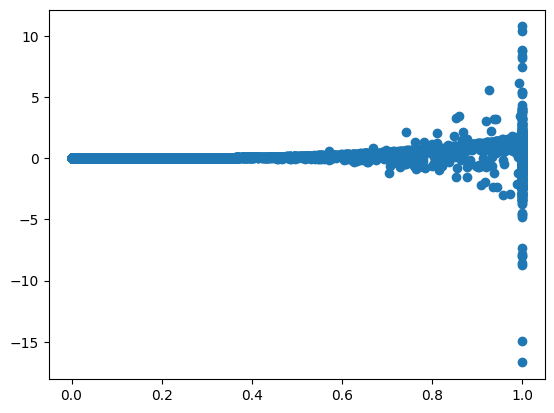

In [11]:
from random import random
import matplotlib.pyplot as plt
memo = []
def u(t, l,eps):
    res =t**3 -l*t**4/4 + t*l* u(t*random(),l,eps) if eps<t else t**3 -l*t**4/4 
    memo.append((t,res))
    return res 

res = 0
l = -3
end = 1
nsim = 10**3
for _ in range(nsim):
    res += u(end,l,0.001)/nsim

print("%error =",(res-end**3)/(end**3))
print(res)
print(end**3)
x,y = zip(*memo)

plt.scatter(x,y)
plt.show()
